<a href="https://colab.research.google.com/github/datacentertugaskuliah-coder/PraktikumDS/blob/main/Hyperparameter_Tuning_Decision_Tree_pada_Dataset_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== METADATA DATASET IRIS ===
{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'h

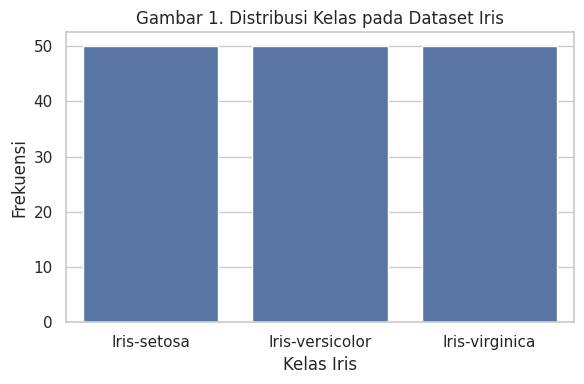

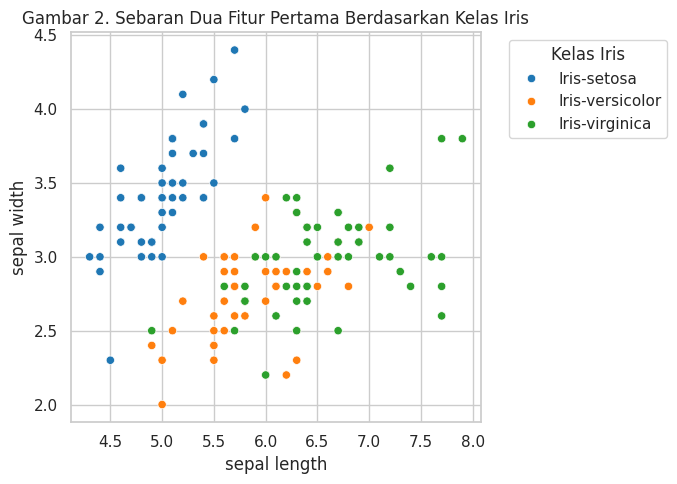

Ukuran data latih : (120, 4)
Ukuran data uji   : (30, 4) 

=== EVALUASI MODEL DASAR DECISION TREE ===
Akurasi model dasar pada data uji: 0.933

Laporan klasifikasi model dasar:
                 precision    recall  f1-score   support

    Iris-setosa      1.000     1.000     1.000        10
Iris-versicolor      0.900     0.900     0.900        10
 Iris-virginica      0.900     0.900     0.900        10

       accuracy                          0.933        30
      macro avg      0.933     0.933     0.933        30
   weighted avg      0.933     0.933     0.933        30

Confusion matrix model dasar:
[[10  0  0]
 [ 0  9  1]
 [ 0  1  9]] 



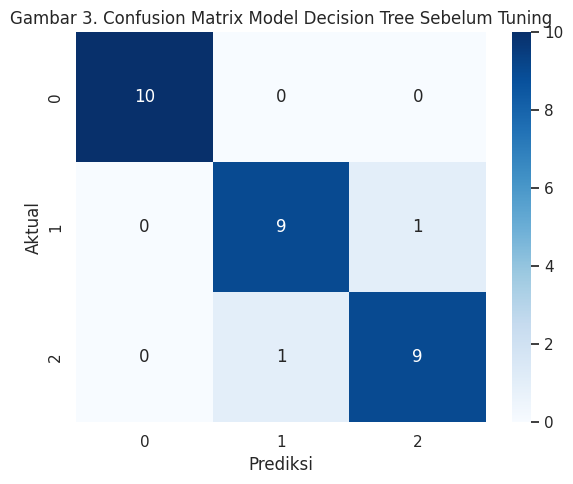

=== HASIL GRID SEARCH HYPERPARAMETER DECISION TREE ===
Parameter terbaik (best_params_):
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2} 

Akurasi rata-rata cross validation terbaik: 0.942

Beberapa kombinasi hyperparameter terbaik:
                                               params  mean_test_score  \
0   {'criterion': 'gini', 'max_depth': None, 'min_...         0.941667   
36  {'criterion': 'gini', 'max_depth': 4, 'min_sam...         0.941667   
48  {'criterion': 'gini', 'max_depth': 5, 'min_sam...         0.941667   
1   {'criterion': 'gini', 'max_depth': None, 'min_...         0.933333   
4   {'criterion': 'gini', 'max_depth': None, 'min_...         0.933333   

    std_test_score  rank_test_score  
0         0.020412                1  
36        0.020412                1  
48        0.020412                1  
1         0.020412                4  
4         0.020412                4   

=== EVALUASI MODEL DECISION TREE SETELAH TUNING ===


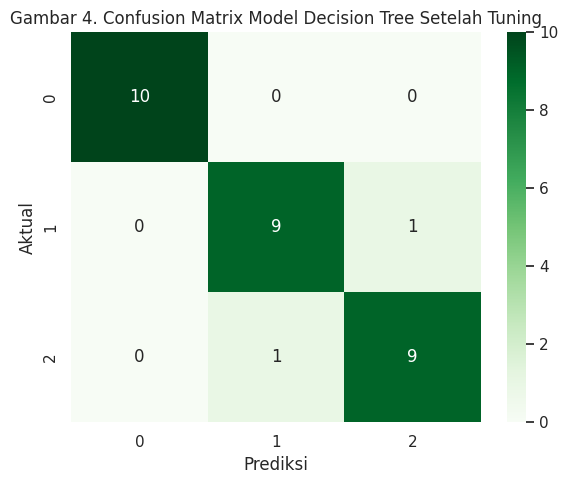

=== TABEL PERBANDINGAN KINERJA MODEL ===
                          Model  Akurasi Data Uji
0           Decision Tree Dasar          0.933333
1  Decision Tree Setelah Tuning          0.933333 



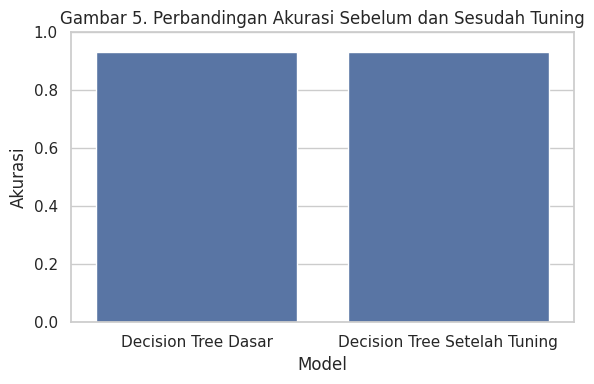

Pentingnya fitur pada model terbaik:
petal length    0.558568
petal width     0.406015
sepal width     0.029167
sepal length    0.006250
dtype: float64 



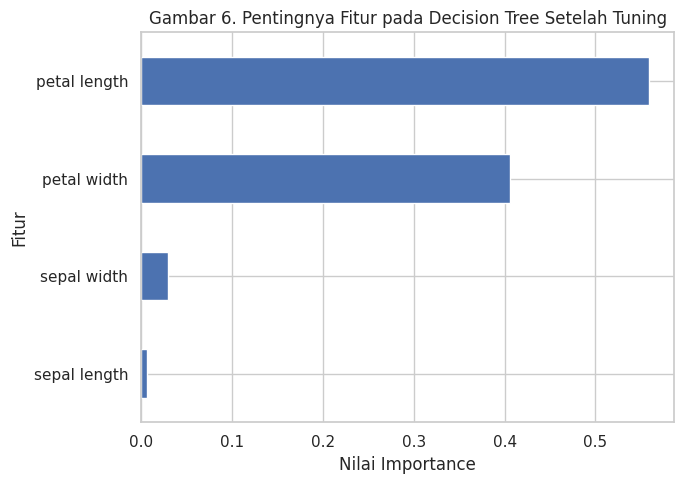

In [ ]:
# ==========================================================
# Judul Program : Hyperparameter Tuning Decision Tree pada Dataset Iris
# Buku         : Praktikum Data Science dan Machine Learning Berbasis Python dan UCI Repository
# Studi Kasus  : Optimasi DecisionTreeClassifier dengan GridSearchCV
# Dataset      : Iris - UCI Machine Learning Repository (ID: 53)
# Link UCI     : https://archive.ics.uci.edu/dataset/53/iris
# Repo         : https://github.com/datacentertugaskuliah-coder/PraktikumDS.git
# Lingkungan   : Google Colab
# ==========================================================

# Instalasi ucimlrepo untuk mengambil dataset dan metadata dari UCI
!pip install ucimlrepo -q

# Tahap 1 - Import pustaka
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.0)

# ==========================================================
# Tahap 2 - Mengambil dataset Iris dari UCI lewat ucimlrepo
# ==========================================================

iris = fetch_ucirepo(id=53)

# Data sebagai DataFrame
X = iris.data.features.copy()
y_df = iris.data.targets.copy()

print("=== METADATA DATASET IRIS ===")
print(iris.metadata, "\n")

print("=== INFORMASI VARIABEL (CONTOH) ===")
print(iris.variables.head(), "\n")

# Gabungkan fitur dan target untuk eksplorasi mudah
target_col = y_df.columns[0]  # biasanya 'class' atau 'species'
df = pd.concat([X, y_df], axis=1)

print("Lima baris pertama data:")
print(df.head(), "\n")

print("Ukuran data (baris, kolom):", df.shape, "\n")

print("Distribusi kelas target:")
print(df[target_col].value_counts(), "\n")

print("Statistik deskriptif fitur numerik:")
print(df.drop(columns=[target_col]).describe().T, "\n")

# ==========================================================
# Tahap 3 - Visualisasi awal dataset Iris
# ==========================================================

# Gambar 1 - Distribusi jumlah sampel per kelas
plt.figure(figsize=(6, 4))
sns.countplot(x=target_col, data=df)
plt.title("Gambar 1. Distribusi Kelas pada Dataset Iris")
plt.xlabel("Kelas Iris")
plt.ylabel("Frekuensi")
plt.tight_layout()
plt.show()

# Gambar 2 - Sebaran panjang dan lebar sepal per kelas
plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=df,
    x=df.columns[0],   # fitur pertama misalnya sepal length
    y=df.columns[1],   # fitur kedua misalnya sepal width
    hue=target_col,
    palette="tab10"
)
plt.title("Gambar 2. Sebaran Dua Fitur Pertama Berdasarkan Kelas Iris")
plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend(title="Kelas Iris", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 4 - Menyiapkan fitur dan target, pemisahan latih dan uji
# ==========================================================

X_fitur = df.drop(columns=[target_col])
y = df[target_col]

nama_fitur = X_fitur.columns

X_train, X_test, y_train, y_test = train_test_split(
    X_fitur,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Ukuran data latih :", X_train.shape)
print("Ukuran data uji   :", X_test.shape, "\n")

# ==========================================================
# Tahap 5 - Model dasar Decision Tree sebelum tuning
# ==========================================================

model_dasar = DecisionTreeClassifier(random_state=42)
model_dasar.fit(X_train, y_train)

y_pred_dasar = model_dasar.predict(X_test)

akurasi_dasar = accuracy_score(y_test, y_pred_dasar)
cm_dasar = confusion_matrix(y_test, y_pred_dasar)

print("=== EVALUASI MODEL DASAR DECISION TREE ===")
print(f"Akurasi model dasar pada data uji: {akurasi_dasar:.3f}\n")
print("Laporan klasifikasi model dasar:")
print(classification_report(y_test, y_pred_dasar, digits=3))

print("Confusion matrix model dasar:")
print(cm_dasar, "\n")

# Gambar 3 - Confusion matrix model dasar
plt.figure(figsize=(6, 5))
sns.heatmap(cm_dasar, annot=True, fmt="d", cmap="Blues")
plt.title("Gambar 3. Confusion Matrix Model Decision Tree Sebelum Tuning")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 6 - Hyperparameter Tuning dengan GridSearchCV
# ==========================================================

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 2, 3, 4, 5],
    "min_samples_split": [2, 4, 6, 8],
    "min_samples_leaf": [1, 2, 3]
}

model_awal = DecisionTreeClassifier(random_state=42)

grid = GridSearchCV(
    estimator=model_awal,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(X_train, y_train)

print("=== HASIL GRID SEARCH HYPERPARAMETER DECISION TREE ===")
print("Parameter terbaik (best_params_):")
print(grid.best_params_, "\n")
print(f"Akurasi rata-rata cross validation terbaik: {grid.best_score_:.3f}\n")

# Konversi hasil grid search ke DataFrame untuk dianalisis
hasil_grid = pd.DataFrame(grid.cv_results_)
kolom_penting = [
    "params",
    "mean_test_score",
    "std_test_score",
    "rank_test_score"
]
print("Beberapa kombinasi hyperparameter terbaik:")
print(hasil_grid[kolom_penting].sort_values("rank_test_score").head(), "\n")

# ==========================================================
# Tahap 7 - Evaluasi model terbaik setelah tuning
# ==========================================================

model_terbaik = grid.best_estimator_
y_pred_tuning = model_terbaik.predict(X_test)

akurasi_tuning = accuracy_score(y_test, y_pred_tuning)
cm_tuning = confusion_matrix(y_test, y_pred_tuning)

print("=== EVALUASI MODEL DECISION TREE SETELAH TUNING ===")
print(f"Akurasi model setelah tuning pada data uji: {akurasi_tuning:.3f}\n")
print("Laporan klasifikasi model setelah tuning:")
print(classification_report(y_test, y_pred_tuning, digits=3))

print("Confusion matrix model setelah tuning:")
print(cm_tuning, "\n")

# Gambar 4 - Confusion matrix model setelah tuning
plt.figure(figsize=(6, 5))
sns.heatmap(cm_tuning, annot=True, fmt="d", cmap="Greens")
plt.title("Gambar 4. Confusion Matrix Model Decision Tree Setelah Tuning")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 8 - Perbandingan kinerja sebelum dan sesudah tuning
# ==========================================================

tabel_perbandingan = pd.DataFrame({
    "Model": ["Decision Tree Dasar", "Decision Tree Setelah Tuning"],
    "Akurasi Data Uji": [akurasi_dasar, akurasi_tuning]
})

print("=== TABEL PERBANDINGAN KINERJA MODEL ===")
print(tabel_perbandingan, "\n")

# Gambar 5 - Diagram batang perbandingan akurasi
plt.figure(figsize=(6, 4))
sns.barplot(
    data=tabel_perbandingan,
    x="Model",
    y="Akurasi Data Uji"
)
plt.title("Gambar 5. Perbandingan Akurasi Sebelum dan Sesudah Tuning")
plt.xlabel("Model")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# ==========================================================
# Tahap 9 - Analisis pentingnya fitur pada model terbaik
# ==========================================================

importances = pd.Series(model_terbaik.feature_importances_, index=nama_fitur)
importances_sorted = importances.sort_values(ascending=True)

print("Pentingnya fitur pada model terbaik:")
print(importances_sorted.sort_values(ascending=False), "\n")

# Gambar 6 - Diagram batang pentingnya fitur
plt.figure(figsize=(7, 5))
importances_sorted.plot(kind="barh")
plt.title("Gambar 6. Pentingnya Fitur pada Decision Tree Setelah Tuning")
plt.xlabel("Nilai Importance")
plt.ylabel("Fitur")
plt.tight_layout()
plt.show()
